#### LIS 590 Data Visualization Spring 2017
#### Group Project by 
#### Group *Summer*: Bei Xiao, La Luo, Liqun Zeng, and Vaishnavi Padala
# Component 3
----
## A Function for A Data Receiving System
### !!! All Output Files Saved to Current Directory !!!

In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import randrange
import cartopy.crs as ccrs
import cartopy
import re
import time
from datetime import datetime
import ipywidgets

from bokeh.io import output_notebook, show, gridplot
from bokeh.plotting import figure
import bokeh.models
from bokeh.models import PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [43]:
def receive_new_data(data = dt):
    
    #### function to tell quantitative and categorical variables ####
    def how_many(data, find_quant = True, return_n = False):
        varlist = data.keys().tolist()
        if find_quant:
            match = 'quant'
        else:
            match = 'cat'
        rx = re.compile(r'^{}'.format(match))
        var_match = [var for var in varlist if re.match(rx, var)]
        if return_n:
            result = len(var_match)
        else:
            result = var_match
        return result
    
    
    #### function to output a simple report about the data ####
    def simple_report(data):
    
        with open('Simple_Report.txt','w') as fout: 
        
            fout.write('Variables in the dataset: \n')
            fout.write('='*75 + '\n')
        
            # a list of all variables:
            fout.write('{}\n'.format(data.keys().tolist()))
            fout.write('='*75 + '\n')

            # report how many categorical variables:
            n_cat = how_many(data, find_quant = False, return_n = True)
            fout.write('Total Number of Categorical Variables:  {}\n'.format(n_cat))
            fout.write('='*75 + '\n')
            cats = how_many(data, find_quant = False)
            fout.write('Categorical Variables:                  {}\n'.format(cats))
            fout.write('='*75 + '\n')
        
            # report how many quantitative variables:
            n_quan = how_many(data, return_n = True)
            fout.write('Total Number of Quantitativ Variables:  {}\n'.format(n_quan))
            fout.write('='*75 + '\n')
            quans = how_many(data)
            fout.write('Quantitative Variables:                 {}\n'.format(quans))
            fout.write('='*75 + '\n')
        
            fout.close()
    
    #### funtion to read the year from "dates" ####
    def getYear(inp):
        temp = datetime.fromtimestamp(inp).strftime('%Y')
        return temp
    
    #### function to visualize a relationship between (quant, quant) and (lon, lat) ####
    #### using Bokeh ####
    
    def var1var2_lonlat(data, quan_list, 
                        cat_list, use_dates = False):

        # Randomly select 2 variables as x and y in the first plot
        quan_select = random.sample(quan_list, 2)
        var1 = quan_select[0]
        var2 = quan_select[1]
    
        if use_dates:
            var2 = 'Year'
        
        # define source data for bokeh
        data_select = data.copy()[['latitude','longitude',var1,var2]]
        source = bokeh.models.ColumnDataSource(data_select)
    
        # figure setting
        TOOLS = 'box_select,lasso_select,help,reset,box_zoom'

        p1 = figure(tools = TOOLS, 
                title = "{0} by {1}".format(var1,var2),
                width=600, height = 600, 
                x_axis_label = var2 , y_axis_label = var1)

        p1.yaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
                
        p2 = figure(tools = TOOLS, 
                title = "Locations",
                width=600, height = 600,
                x_axis_label = 'longitude', y_axis_label = "latitude")

        p2.xaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
        p2.yaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
    
        # draw figures
        p1.circle(var2,var1, source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")
        p2.circle('longitude','latitude', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")
    
        p = gridplot([[p1, p2]])
        show(p)
    
        # also output as a html file
        html = file_html(p, CDN, "Linked Viewing: {0} by {1} and Locations".format(var1,var2))
        html_file = open("Bohek_{0}_by_{1}_and_Locations.html".format(var1,var2),"w")
        html_file.write(html)
        html_file.close()
    
    #### function to visualize a relationship between categorical and quantitative variable ####
    def qua_by_cat(data):
        cat = data["categorical"].tolist()
        cat_set = set(cat)
        cat_list = list(cat_set)
        cat_list.sort()
        n = len(cat_list)
        q = []
        for i in range(n):
            q.append(cat.count(cat_list[i]))
        ind = range(n)
        fig = plt.figure(figsize=(5, 5))
        height = 0.5
        p1=plt.barh(ind,q,height, color="cyan")
        plt.yticks(ind,cat_list,rotation='horizontal')
        plt.xlabel('Quantity', fontsize = 14)
        plt.ylabel('Category', fontsize = 14)
        plt.title('Quantitative by Category', fontsize = 16)
        title = 'Quantitative_by_Category'
        fig.savefig('{}.png'.format(title))
    
    #### function to 3D visualize relationships of quant1, quant2, quant3 with category information ####
    def q1q2q3_with_catColor(data):
        cat = data["categorical"].tolist()
        cat_set = set(cat)
        cat_list = list(cat_set)
        a = data["quant1"].tolist()
        b = data["quant2"].tolist()
        c = data["quant3"].tolist()
        colors = cm.rainbow(np.linspace(0, 1, len(cat_list)))
        use_colors = {}
        i = 0
        for category in cat_list:
            use_colors[category] = colors[i]
            i+=1
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax = Axes3D(fig)
        ax.scatter(a,b,c,color=[use_colors[x] for x in cat])
        xLabel = ax.set_xlabel('Quant1', linespacing=3.2)
        yLabel = ax.set_ylabel('Quant2', linespacing=3.1)
        zLabel = ax.set_zlabel('Quant3', linespacing=3.4)       
        plt.title('Quant1 Quan2 Quant3 by Category', fontsize = 14)
        title = 'Quant1_Quan2_Quant3_by_Category'
        fig.savefig('{}.png'.format(title))
        
    #### function to draw locations on map ####       
    def mapplot(data):
        fig, ax = plt.subplots(figsize = (20,20))
        ax = plt.axes(projection = ccrs.PlateCarree())
        ax.coastlines()
        #ax.stock_img()
        ax.scatter(data["longitude"],data["latitude"],c="#f7cac9")
        ax.set_title('Spatial Distribution', fontsize = 22)
        #ax.gridlines()  
        title = 'Locations'
        fig.savefig('{}.png'.format(title))
    
    def groupmap(data,column="categorical"):
        groups=data.groupby(column)
        fig, ax = plt.subplots(figsize = (20,20))
        ax = plt.axes(projection = ccrs.PlateCarree())
        ax.coastlines()
        for name, group in groups:
            ax.plot(group.longitude, group.latitude, marker='.', linestyle='', ms=12, label=name,alpha=0.3)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.025),
              fancybox=True, shadow=True, ncol=5)
        ax.set_title('Map by categorical data', fontsize = 22)
        title = 'Locations_with_Categorical_Information'
        fig.savefig('{}.png'.format(title))
    
    #######################################################################################
    
    ### write out a simple report about the data ###
    simple_report(data)
    
    ### Add 'Year' Column to data ###
    data['Year'] = data.dates.apply(getYear)
    
    ### Categorical VS Quantitative: Output to png file ###
    qua_by_cat(data)
    
    ### Quant1, Quant2, Quant2 with Category Information: Output to png file ###
    q1q2q3_with_catColor(data)
    
    ### Bokeh Data Linked Viewing: Output to html files ###
    output_notebook()
    quans = how_many(data)
    cats = how_many(data, find_quant = False)
    ### (Quant, Quant) with (Lon, Lat) ###
    var1var2_lonlat(data, quan_list = quans, cat_list = cats)
    ### (Quant, Year) with (Lon, Lat) ###
    var1var2_lonlat(data, quan_list = quans, cat_list = cats, use_dates = True)
    
    ### Spatial Information 1 Locations on a map: Output to a png file ###
    mapplot(data)
    ### Spatial Information 2 Locations by category on a map: Output to a png file ###
    groupmap(data,"categorical")
    
    ### 

## Read in Data and Automatically Generate Report

In [41]:
#receive_new_data()

## Read in Sample Data and Test

In [32]:
dt = pd.read_csv("sample_flat.csv")

Loading BokehJS ...

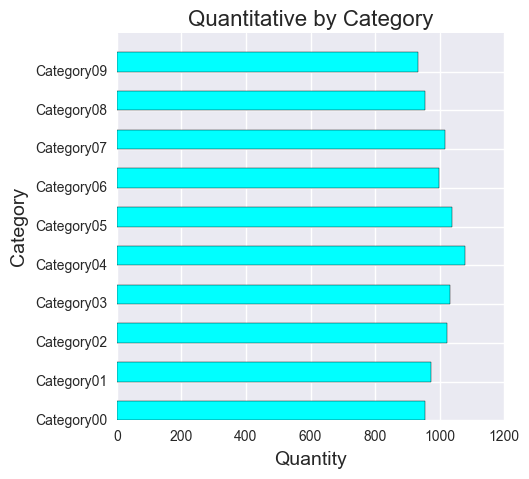

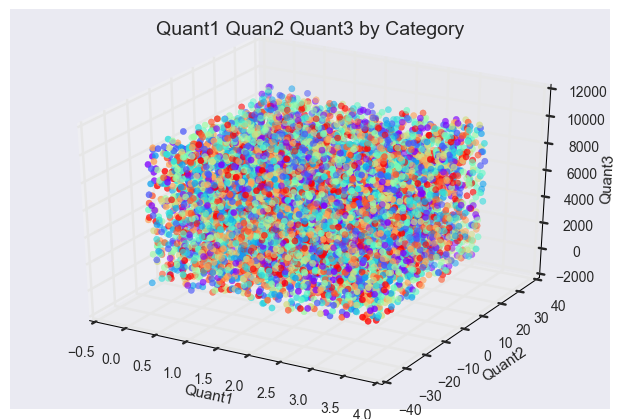

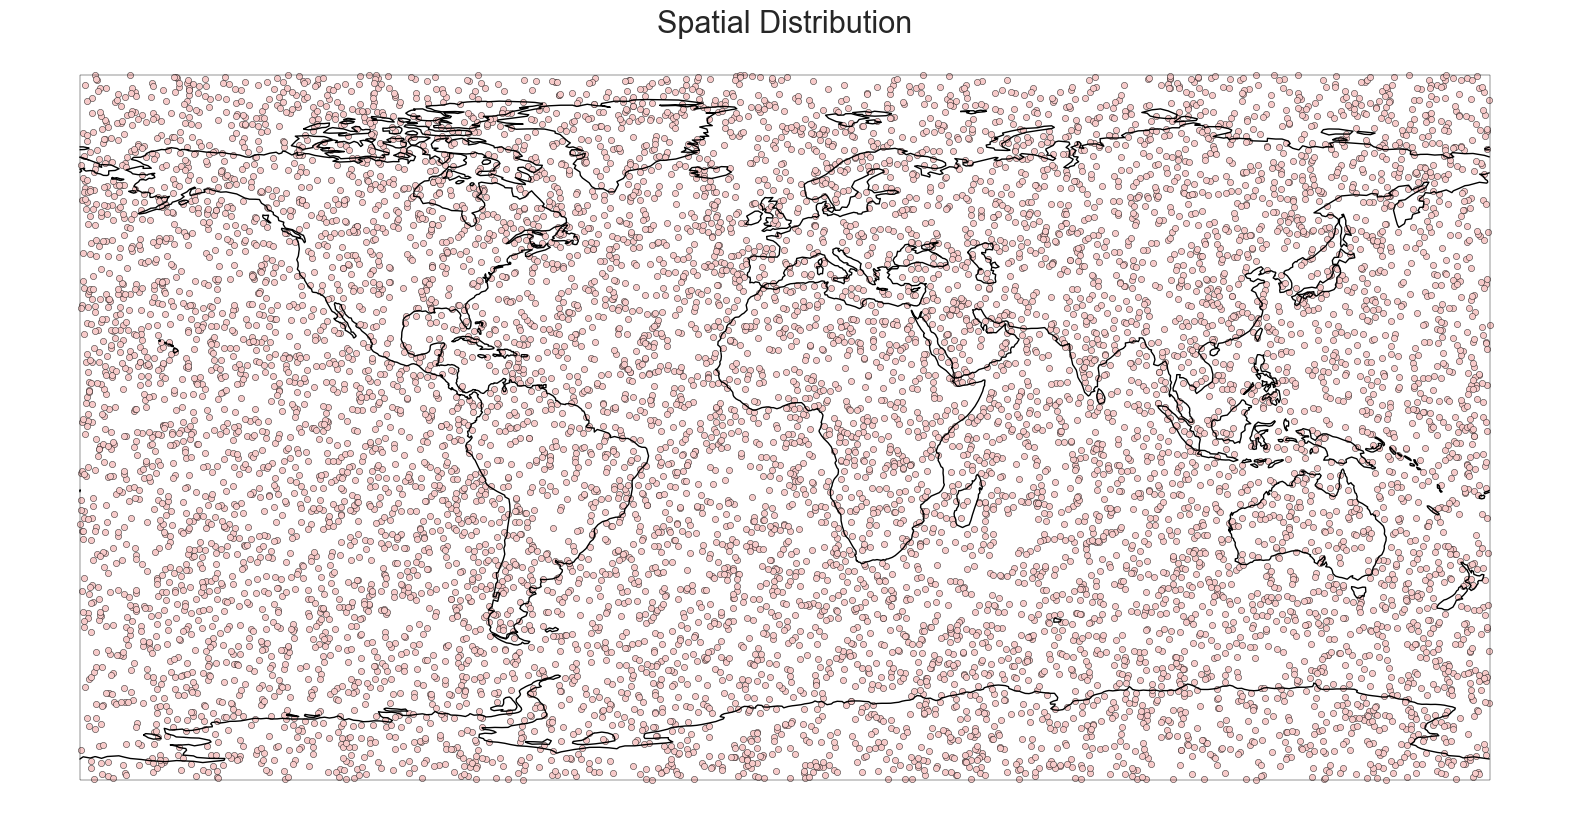

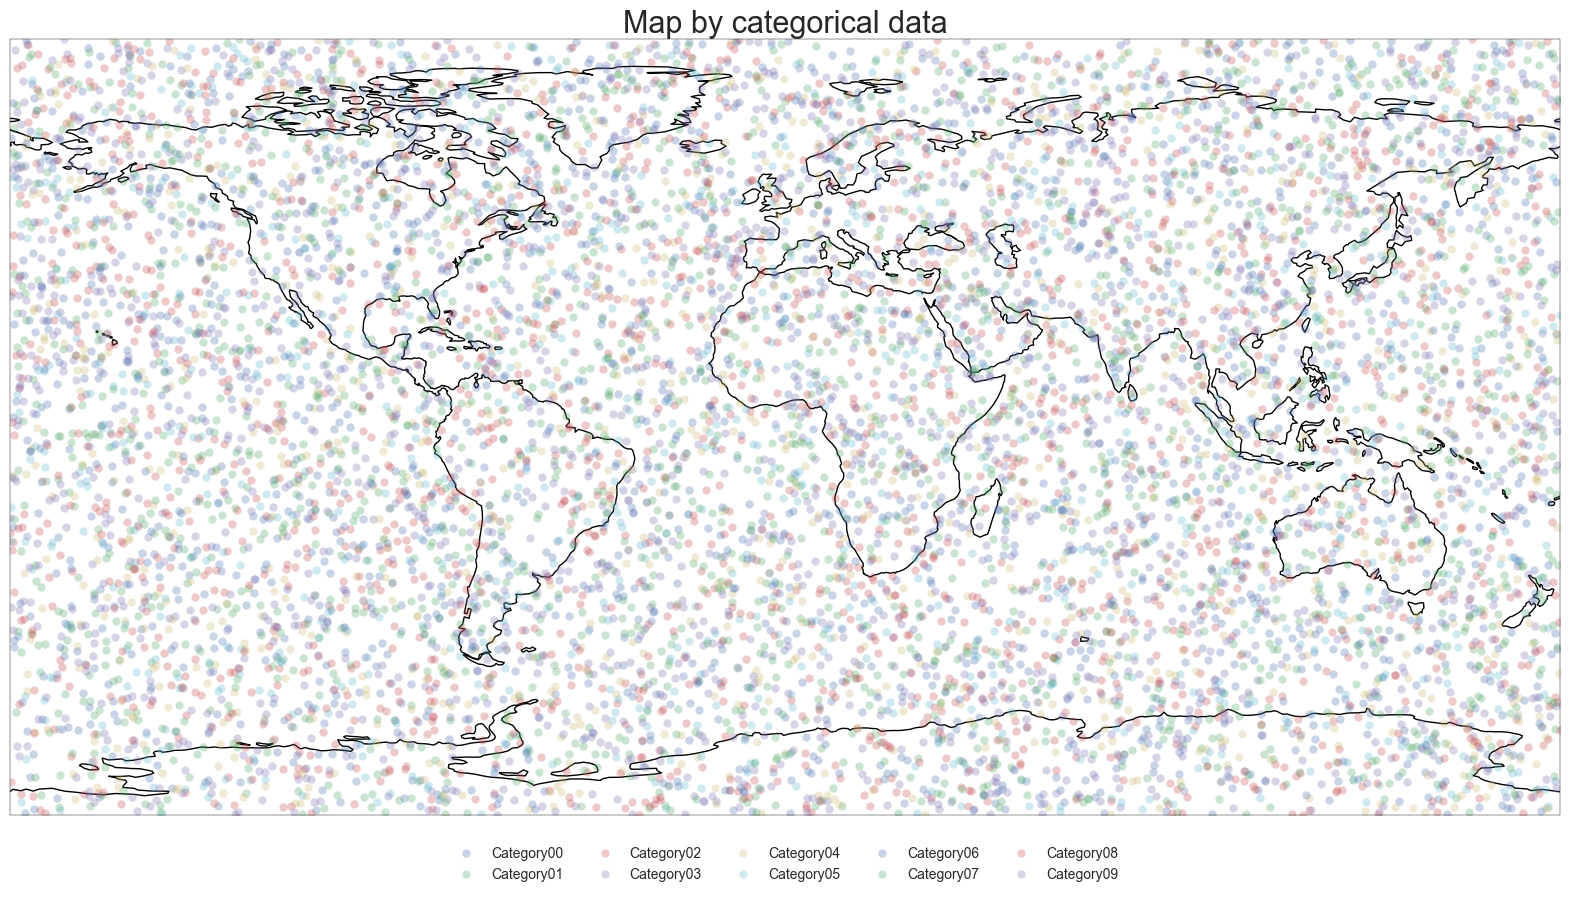

In [39]:
receive_new_data(data = dt)